In [ ]:
#This block is for me to run in Google colab
from google.colab import drive
drive.mount("/content/drive")

import sys
sys.path.insert(0,"/content/drive/My Drive/Research/Coherent One Shot Hamiltonian Simulation")

!pip install cirq

In [2]:
# Import packages
from qsp_models import *  #Make sure that qsp_models is in your directory
import tensorflow as tf
import numpy as np

# visualization tools
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
import scipy
import IPython
from scipy.special import lambertw
from scipy.optimize import fsolve
from keras import backend as K

sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
def mean_deviation(y_true, y_pred):
  deviations = tf.abs(tf.subtract(y_true, y_pred))
  loss = tf.math.reduce_mean(deviations)
  return loss


def max_deviation(y_true, y_pred):
  deviations = tf.abs(tf.subtract(y_true, y_pred))
  loss = tf.math.reduce_max(deviations)
  return loss


def mean_deviation_squared(y_true, y_pred):
  deviations = tf.abs(tf.subtract(y_true, y_pred))
  loss = tf.math.reduce_mean(tf.square(deviations))
  return loss


def max_deviation_squared(y_true, y_pred):
  deviations = tf.abs(tf.subtract(y_true, y_pred))
  loss = tf.math.reduce_max(tf.square(deviations))
  return loss

In [4]:
#Hamiltonian Properties

h1 = 0
h2 =0
gx = 1
gy = 0
gz = 0

eigenvals = np.array([-gz-(gx**2+2*gx*gy+gy**2+h1**2-2*h1*h2+h2**2)**0.5, 
                      -gz+(gx**2+2*gx*gy+gy**2+h1**2-2*h1*h2+h2**2)**0.5,
                      gz-(gx**2+2*gx*gy+gy**2+h1**2-2*h1*h2+h2**2)**0.5,
                      gz+(gx**2+2*gx*gy+gy**2+h1**2-2*h1*h2+h2**2)**0.5])
alpha = max(np.abs(eigenvals))

## **Finding Phase Angles for Cosine**

Epoch 1/500
2/2 - 15s - loss: 1.6797
Epoch 2/500
2/2 - 0s - loss: 1.3797
Epoch 3/500
2/2 - 0s - loss: 1.1636
Epoch 4/500
2/2 - 0s - loss: 1.0536
Epoch 5/500
2/2 - 0s - loss: 0.8450
Epoch 6/500
2/2 - 0s - loss: 0.7015
Epoch 7/500
2/2 - 0s - loss: 0.6144
Epoch 8/500
2/2 - 0s - loss: 0.5205
Epoch 9/500
2/2 - 0s - loss: 0.4298
Epoch 10/500
2/2 - 0s - loss: 0.3630
Epoch 11/500
2/2 - 0s - loss: 0.2982
Epoch 12/500
2/2 - 0s - loss: 0.2668
Epoch 13/500
2/2 - 0s - loss: 0.2513
Epoch 14/500
2/2 - 0s - loss: 0.2326
Epoch 15/500
2/2 - 0s - loss: 0.2197
Epoch 16/500
2/2 - 0s - loss: 0.2009
Epoch 17/500
2/2 - 0s - loss: 0.1839
Epoch 18/500
2/2 - 0s - loss: 0.1656
Epoch 19/500
2/2 - 0s - loss: 0.1499
Epoch 20/500
2/2 - 0s - loss: 0.1319
Epoch 21/500
2/2 - 0s - loss: 0.1187
Epoch 22/500
2/2 - 0s - loss: 0.1049
Epoch 23/500
2/2 - 0s - loss: 0.0942
Epoch 24/500
2/2 - 0s - loss: 0.0923
Epoch 25/500
2/2 - 0s - loss: 0.0884
Epoch 26/500
2/2 - 0s - loss: 0.0842
Epoch 27/500
2/2 - 0s - loss: 0.0826
Epoch 28/

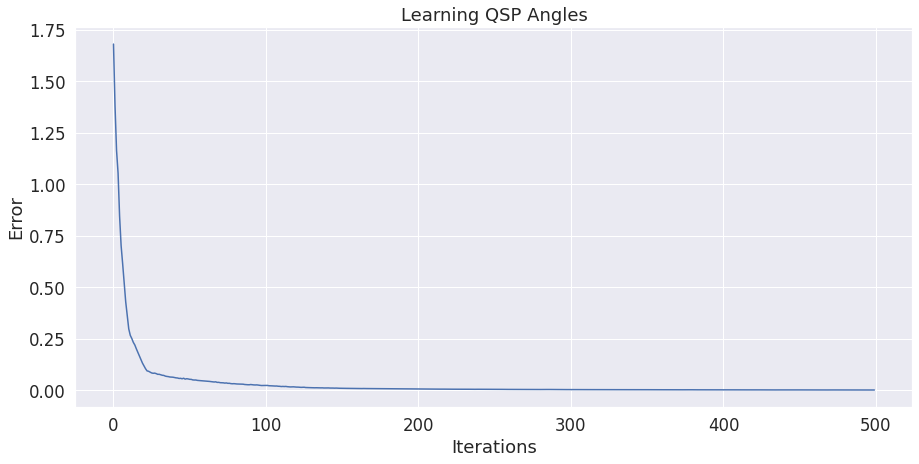

Epoch 1/150
1/1 - 16s - loss: 0.0015
Epoch 2/150
1/1 - 0s - loss: 0.0015
Epoch 3/150
1/1 - 0s - loss: 0.0015
Epoch 4/150
1/1 - 0s - loss: 0.0015
Epoch 5/150
1/1 - 0s - loss: 0.0015
Epoch 6/150
1/1 - 0s - loss: 0.0015
Epoch 7/150
1/1 - 0s - loss: 0.0015
Epoch 8/150
1/1 - 0s - loss: 0.0014
Epoch 9/150
1/1 - 0s - loss: 0.0014
Epoch 10/150
1/1 - 0s - loss: 0.0014
Epoch 11/150
1/1 - 0s - loss: 0.0014
Epoch 12/150
1/1 - 0s - loss: 0.0014
Epoch 13/150
1/1 - 0s - loss: 0.0014
Epoch 14/150
1/1 - 0s - loss: 0.0014
Epoch 15/150
1/1 - 0s - loss: 0.0014
Epoch 16/150
1/1 - 0s - loss: 0.0014
Epoch 17/150
1/1 - 0s - loss: 0.0014
Epoch 18/150
1/1 - 0s - loss: 0.0014
Epoch 19/150
1/1 - 0s - loss: 0.0014
Epoch 20/150
1/1 - 0s - loss: 0.0014
Epoch 21/150
1/1 - 0s - loss: 0.0014
Epoch 22/150
1/1 - 0s - loss: 0.0014
Epoch 23/150
1/1 - 0s - loss: 0.0014
Epoch 24/150
1/1 - 0s - loss: 0.0014
Epoch 25/150
1/1 - 0s - loss: 0.0014
Epoch 26/150
1/1 - 0s - loss: 0.0014
Epoch 27/150
1/1 - 0s - loss: 0.0014
Epoch 28/

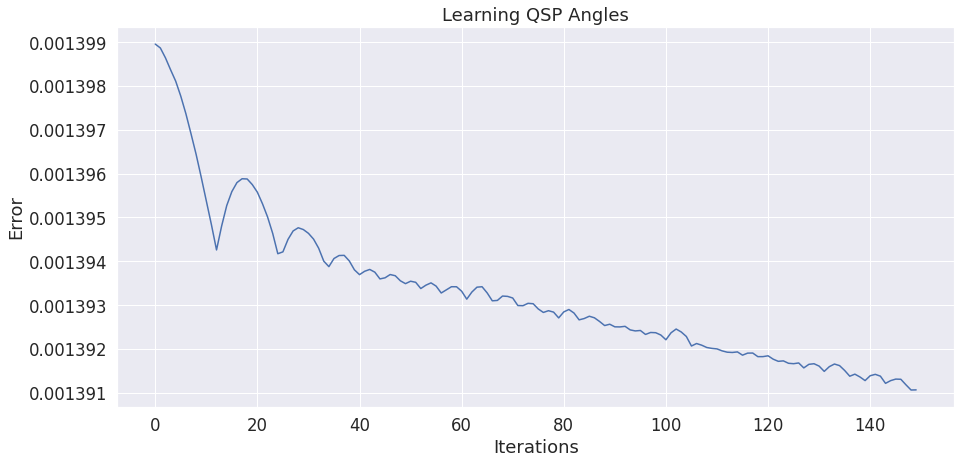

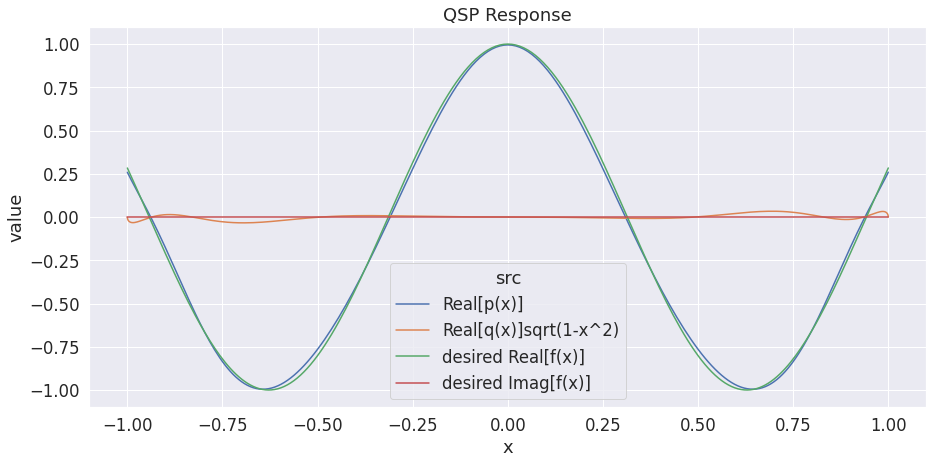

In [5]:
# Simulation setup
t = 5.0
tau = t*alpha

# Polynomial setup
poly_deg = 16   # Make sure to choose an even degree for cosine
f_real = lambda x: np.cos(tau * x)
f_imag = lambda x: 0*x

# QSP convention and learning rate
convention = 1      # 0 = |0><0| convention, 1 = |+><+| convention
learning_rate = 0.008

# Define loss function as maximum squared error; mean squared error also works well here
mean_or_max = 1     # 0=mean, 1=max
squared = 1         # 0=|y_pred-y_true|, 1=|y_pred-y_true|^2

# The intput theta training values 
th_in = np.linspace(0, np.pi, 200)
th_in = tf.reshape(th_in, (th_in.shape[0], 1))

# We desire p(x) to be f(x)
expected_outputs = (f_real(np.cos(th_in))[:,0] +1j*f_imag(np.cos(th_in))[:,0]).astype('complex64')

# Train the model
model = construct_qsp_model(poly_deg, convention, learning_rate, mean_or_max, squared)
history = model.fit(x=th_in, y=expected_outputs, batch_size=100, epochs=500, verbose=2)
plot_loss(history)

# Additional training steps at smaller learning rate
K.set_value(model.optimizer.learning_rate, 0.0005)
history = model.fit(x=th_in, y=expected_outputs, batch_size = 500, epochs=150, verbose=2)
K.set_value(model.optimizer.learning_rate, 0.00001)
history = model.fit(x=th_in, y=expected_outputs, batch_size = 500, epochs=150, verbose=2)
plot_loss(history)
plot_qsp_response(f_real, f_imag, model, convention)


In [6]:
# Calculate error
th_in2 =  np.linspace(0, np.pi, int(1e4))
th_in2 = tf.reshape(th_in2, (th_in2.shape[0], 1))
expected_outputs2 = (f_real(np.cos(th_in2))[:,0] +1j*f_imag(np.cos(th_in2))[:,0]).astype('complex64')

error = max_deviation(model(th_in2), expected_outputs2).numpy()
print(str(error))

0.037310984


In [7]:
# Output QSP phases
phis = model.trainable_weights[0].numpy()
for phi in phis:
  print(phi[0])

2.3009472
0.4855428
1.0873742
3.5394776
2.881866
1.7444934
2.339881
2.1458495
1.9608608
0.9136168
2.3209376
1.5304357
1.6528995
2.14817
0.121722564
2.4975119
0.4357998


## **Finding Phase Angles for Sine**

Epoch 1/500
2/2 - 14s - loss: 1.6822
Epoch 2/500
2/2 - 0s - loss: 1.4486
Epoch 3/500
2/2 - 0s - loss: 1.2186
Epoch 4/500
2/2 - 0s - loss: 0.9987
Epoch 5/500
2/2 - 0s - loss: 0.7915
Epoch 6/500
2/2 - 0s - loss: 0.6011
Epoch 7/500
2/2 - 0s - loss: 0.4336
Epoch 8/500
2/2 - 0s - loss: 0.3157
Epoch 9/500
2/2 - 0s - loss: 0.3231
Epoch 10/500
2/2 - 0s - loss: 0.3187
Epoch 11/500
2/2 - 0s - loss: 0.2921
Epoch 12/500
2/2 - 0s - loss: 0.2527
Epoch 13/500
2/2 - 0s - loss: 0.2325
Epoch 14/500
2/2 - 0s - loss: 0.2125
Epoch 15/500
2/2 - 0s - loss: 0.1785
Epoch 16/500
2/2 - 0s - loss: 0.1661
Epoch 17/500
2/2 - 0s - loss: 0.1599
Epoch 18/500
2/2 - 0s - loss: 0.1659
Epoch 19/500
2/2 - 0s - loss: 0.1553
Epoch 20/500
2/2 - 0s - loss: 0.1338
Epoch 21/500
2/2 - 0s - loss: 0.1283
Epoch 22/500
2/2 - 0s - loss: 0.1257
Epoch 23/500
2/2 - 0s - loss: 0.1216
Epoch 24/500
2/2 - 0s - loss: 0.1159
Epoch 25/500
2/2 - 0s - loss: 0.1050
Epoch 26/500
2/2 - 0s - loss: 0.0998
Epoch 27/500
2/2 - 0s - loss: 0.0981
Epoch 28/

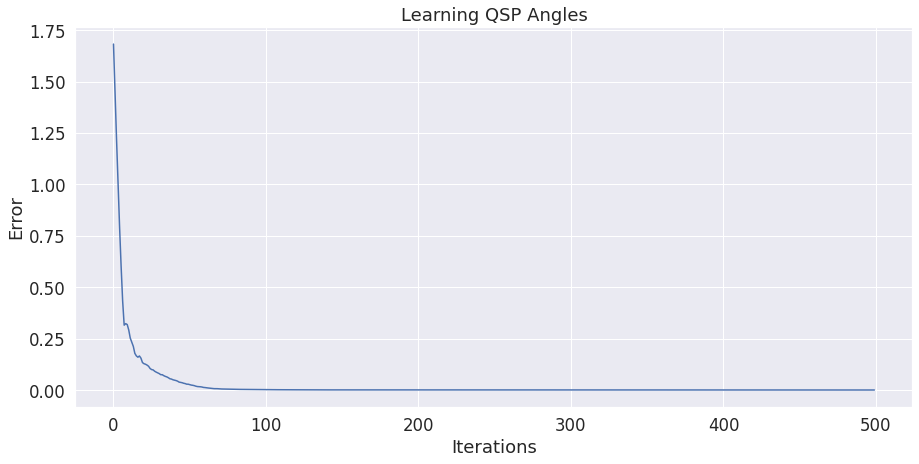

Epoch 1/150
1/1 - 16s - loss: 4.4145e-04
Epoch 2/150
1/1 - 0s - loss: 4.4157e-04
Epoch 3/150
1/1 - 0s - loss: 4.4122e-04
Epoch 4/150
1/1 - 0s - loss: 4.4045e-04
Epoch 5/150
1/1 - 0s - loss: 4.3930e-04
Epoch 6/150
1/1 - 0s - loss: 4.3779e-04
Epoch 7/150
1/1 - 0s - loss: 4.3598e-04
Epoch 8/150
1/1 - 0s - loss: 4.3388e-04
Epoch 9/150
1/1 - 0s - loss: 4.3476e-04
Epoch 10/150
1/1 - 0s - loss: 4.3625e-04
Epoch 11/150
1/1 - 0s - loss: 4.3708e-04
Epoch 12/150
1/1 - 0s - loss: 4.3732e-04
Epoch 13/150
1/1 - 0s - loss: 4.3701e-04
Epoch 14/150
1/1 - 0s - loss: 4.3623e-04
Epoch 15/150
1/1 - 0s - loss: 4.3497e-04
Epoch 16/150
1/1 - 0s - loss: 4.3336e-04
Epoch 17/150
1/1 - 0s - loss: 4.3197e-04
Epoch 18/150
1/1 - 0s - loss: 4.3281e-04
Epoch 19/150
1/1 - 0s - loss: 4.3312e-04
Epoch 20/150
1/1 - 0s - loss: 4.3294e-04
Epoch 21/150
1/1 - 0s - loss: 4.3231e-04
Epoch 22/150
1/1 - 0s - loss: 4.3128e-04
Epoch 23/150
1/1 - 0s - loss: 4.3085e-04
Epoch 24/150
1/1 - 0s - loss: 4.3123e-04
Epoch 25/150
1/1 - 0s - 

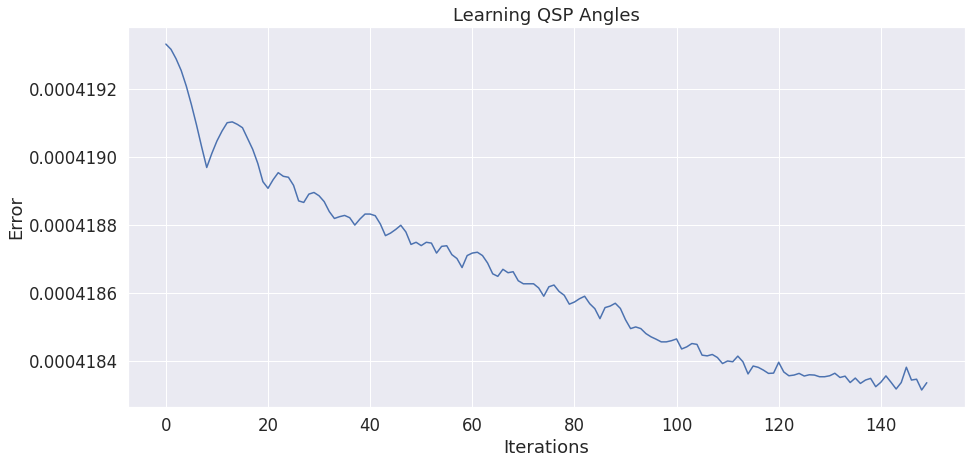

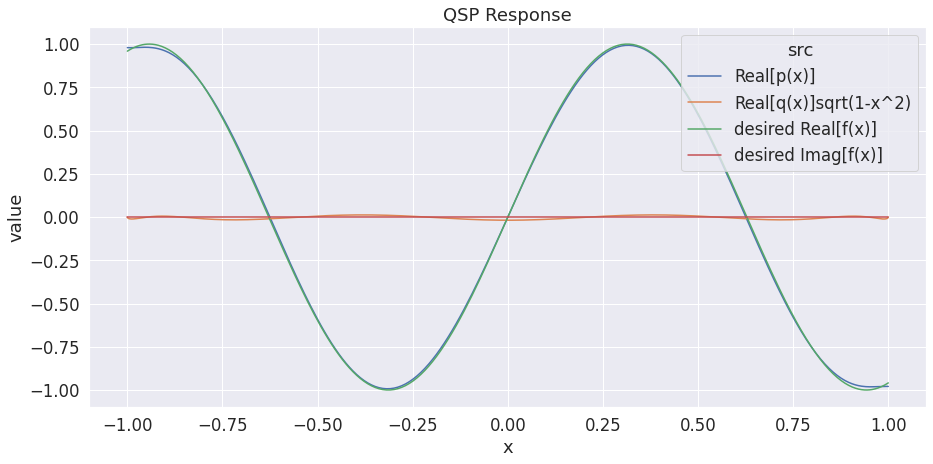

In [8]:
# Simulation setup
t = 5.0
tau = t*alpha

# Polynomial setup
poly_deg = 15   # Make sure to choose an even degree for cosine
f_real = lambda x: np.sin(tau * x)
f_imag = lambda x: 0*x

# QSP convention and learning rate
convention = 1      # 0 = |0><0| convention, 1 = |+><+| convention
learning_rate = 0.008

# Define loss function as maximum squred error
mean_or_max = 1     # 0=mean, 1=max
squared = 1         # 0=|y_pred-y_true|, 1=|y_pred-y_true|^2

# The intput theta training values 
th_in = np.linspace(0, np.pi, 200)
th_in = tf.reshape(th_in, (th_in.shape[0], 1))

# We desire p(x) to be f(x)
expected_outputs = (f_real(np.cos(th_in))[:,0] +1j*f_imag(np.cos(th_in))[:,0]).astype('complex64')

# Train the model
model = construct_qsp_model(poly_deg, convention, learning_rate, mean_or_max, squared)
history = model.fit(x=th_in, y=expected_outputs, batch_size=100, epochs=500, verbose=2)
plot_loss(history)

# Additional training steps at smaller learning rate
K.set_value(model.optimizer.learning_rate, 0.0005)
history = model.fit(x=th_in, y=expected_outputs, batch_size = 500, epochs=150, verbose=2)
K.set_value(model.optimizer.learning_rate, 0.00001)
history = model.fit(x=th_in, y=expected_outputs, batch_size = 500, epochs=150, verbose=2)
plot_loss(history)
plot_qsp_response(f_real, f_imag, model, convention)


In [9]:
# Calculate error
th_in2 =  np.linspace(0, np.pi, int(1e4))
th_in2 = tf.reshape(th_in2, (th_in2.shape[0], 1))
expected_outputs2 = (f_real(np.cos(th_in2))[:,0] +1j*f_imag(np.cos(th_in2))[:,0]).astype('complex64')

error = max_deviation(model(th_in2), expected_outputs2).numpy()
print(str(error))

0.020467505


In [10]:
#Output QSP phases
phis = model.trainable_weights[0].numpy()
for phi in phis:
  print(phi[0])

2.1888506
1.495471
2.737312
2.1162643
3.3751175
1.1632041
2.136072
1.8469343
3.1749504
0.1854647
0.3842428
1.2421392
2.605889
1.2785069
0.0018126527
2.5455494
